In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import random

In [ ]:
%cd "/content/drive/MyDrive/Final"

/content/drive/.shortcut-targets-by-id/1ujc0rEwHZPLX-PmA8l7W_lrmuFS-3EZr/Final


In [ ]:
%ls

 Dataset/                                old_proposal/
'feature_maps (1).jpg'                   roLabelImg-master.zip
 feature_maps.jpg                        Tasks.gdoc
'Feedback Questions.gdoc'               'Uncropped Dataset.ipynb'
 labeling_tutorial.mov                   yolov5/
'Links for age estimation papers.gdoc'   yolov5s.pt
 New_Final_Cross_Race_Effect/


# Data Loading

In [ ]:
#!tar -xvf "./Dataset/part1.tar.gz"
#!tar -xvf "./Dataset/part2.tar.gz"
#!tar -xvf "./Dataset/part3.tar.gz"

In [ ]:
#!tar -zxvf "./Dataset/crop_part1.tar.gz"
#!tar -zxvf "./Dataset/UTKFace.tar.gz"

In [ ]:
import os
from os.path import isfile, join

crop_path = "./Dataset/UTKFace/"

crop_list = [f for f in os.listdir(crop_path) if isfile(join(crop_path,f)) and f.endswith(".jpg")]

In [ ]:
import pandas as pd 

age_list = []
gender_list = []
race_list = []

for crop_img_name in crop_list:
  
  img_name = crop_img_name.split("_")

  age_list.append(int(img_name[0]))
  gender_list.append(img_name[1])
  race_list.append(img_name[2])

df = pd.DataFrame({
    "img":crop_list,
    "age":age_list,
    "gender":gender_list,
    "race":race_list
})

df[100:120]

,img,age,gender,race
100,61_0_3_20170119211849977.jpg.chip.jpg,61,0,3
101,61_0_3_20170119211851089.jpg.chip.jpg,61,0,3
102,61_0_3_20170119211851937.jpg.chip.jpg,61,0,3
103,61_0_3_20170119211819474.jpg.chip.jpg,61,0,3
104,61_0_3_20170119211835296.jpg.chip.jpg,61,0,3
105,61_0_3_20170119211853505.jpg.chip.jpg,61,0,3
106,61_0_3_20170119211852753.jpg.chip.jpg,61,0,3
107,63_0_3_20170119205921327.jpg.chip.jpg,63,0,3
108,61_1_3_20170119211928409.jpg.chip.jpg,61,1,3
109,61_1_3_20170119211903336.jpg.chip.jpg,61,1,3


# Data Visualization 

## Race

In [ ]:
# Some images was not labeled with race
df['race'].value_counts()

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170116174525125.jpg.chip.jpg        1
20170109150557335.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
Name: race, dtype: int64

In [ ]:
# Find the img location, find the location from without labeling
outliers = []
for i,race in enumerate(df["race"]):
  if(race == "20170116174525125.jpg.chip.jpg" or race == "20170109150557335.jpg.chip.jpg" or race == "20170109142408075.jpg.chip.jpg"):
    print(i)
    outliers.append(i)

3374
15800
15805


In [ ]:
outliers

[3374, 15800, 15805]

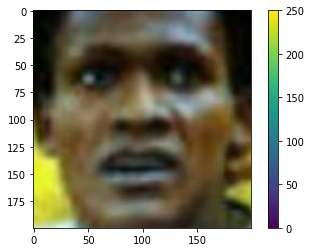

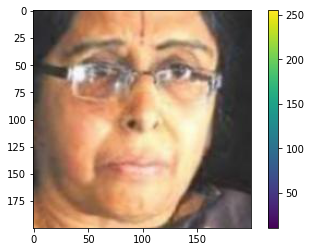

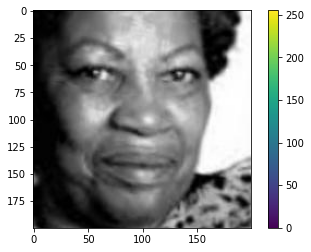

In [ ]:
# show the image for manual label
for outlier in outliers:
  img = plt.imread(join(crop_path,df["img"][outlier]))
  plt.imshow(img)
  plt.colorbar()
  plt.show()

In [ ]:
# label the images 
df["race"][outliers[0]] = "1"
df["race"][outliers[1]] = "3"
df["race"][outliers[2]] = "1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
# Check if every images are labeled
df['race'].value_counts()

0    10078
1     4528
3     3976
2     3434
4     1692
Name: race, dtype: int64

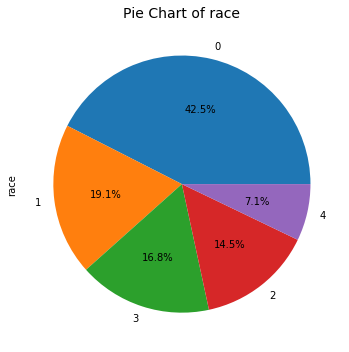

In [ ]:
plt.figure(figsize=(5,5))
df['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of race", fontdict={'fontsize': 14})
plt.tight_layout()

In [ ]:
df_race3 = df[df["race"] == "3"]

In [ ]:
df_race3

,img,age,gender,race
0,56_0_3_20170119180916188.jpg.chip.jpg,56,0,3
1,56_0_3_20170119183551541.jpg.chip.jpg,56,0,3
3,56_0_3_20170119174930466.jpg.chip.jpg,56,0,3
4,56_0_3_20170119180731484.jpg.chip.jpg,56,0,3
5,56_0_3_20170119152358239.jpg.chip.jpg,56,0,3
...,...,...,...,...
22809,1_0_3_20161220223247506.jpg.chip.jpg,1,0,3
22810,1_0_3_20161220223250813.jpg.chip.jpg,1,0,3
22811,5_0_3_20161220223303987.jpg.chip.jpg,5,0,3
22813,4_1_3_20161220223310227.jpg.chip.jpg,4,1,3


### devided race

In [ ]:
race_num = "3"

race_num_list = df.index[df['race'] == race_num].tolist()

df_race = df.iloc[race_num_list]
df_race

,img,age,gender,race
0,56_0_3_20170119180916188.jpg.chip.jpg,56,0,3
1,56_0_3_20170119183551541.jpg.chip.jpg,56,0,3
3,56_0_3_20170119174930466.jpg.chip.jpg,56,0,3
4,56_0_3_20170119180731484.jpg.chip.jpg,56,0,3
5,56_0_3_20170119152358239.jpg.chip.jpg,56,0,3
...,...,...,...,...
22809,1_0_3_20161220223247506.jpg.chip.jpg,1,0,3
22810,1_0_3_20161220223250813.jpg.chip.jpg,1,0,3
22811,5_0_3_20161220223303987.jpg.chip.jpg,5,0,3
22813,4_1_3_20161220223310227.jpg.chip.jpg,4,1,3


In [ ]:
 mask1 = df_race3["age"] < 100
 mask2 = df_race3["age"] >= 0
 df_0_100_race3 = df_race3[mask1 & mask2]
 df_0_100_race3.shape

(3974, 4)

In [ ]:
# age_20_50_index = df_race.index[(df_race['age'] < 50)&(df_race['age'] >= 20)]
# df_20_50_race = df.iloc[age_20_50_index]
# df_20_50_race.shape

In [ ]:
age_range_list = []

for age in df_race3["age"]:
  if(int(age) < 10):
      # set 20-24 as class 0
      age_range_list.append(0)
  elif(int(age)>=10 and int(age) < 20):
      # set 25-29 as class 1
      age_range_list.append(1)
  elif(int(age)>=20 and int(age) < 30):
      # set 30-34 as class 2
       age_range_list.append(2)
  elif(int(age)>=30 and int(age) < 40):
  #     # set 35-39 as class 3
       age_range_list.append(3)
  elif(int(age)>=40 and int(age) < 50):
  #     # set 40-44 as class 4
       age_range_list.append(4)
  elif(int(age)>=50 and int(age) < 60):
  #     # set 40-44 as class 4
       age_range_list.append(5)
  elif(int(age)>=60):
       # set 45-49 as class 5
       age_range_list.append(6)

df_race3["age_range"] = age_range_list
#df["age_range"] = age_range_list
print(df_race3.shape)


(3976, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


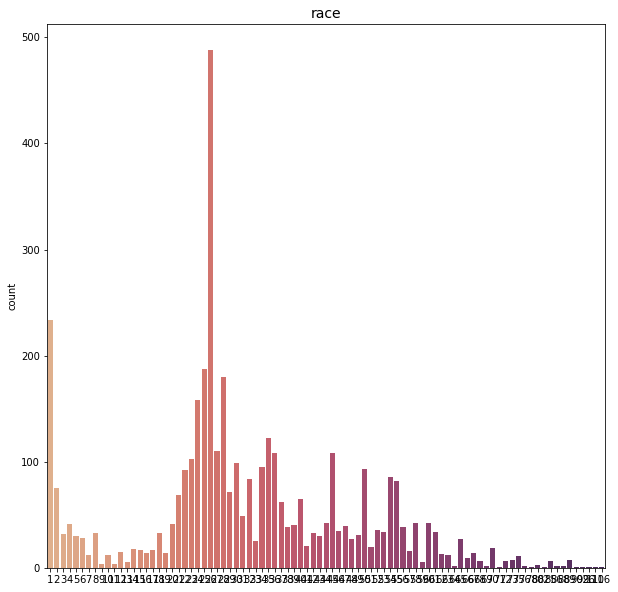

In [ ]:
alist = np.array(df_race3["age"]).astype("int")
plt.figure(figsize=(10,10))
sns.countplot(x=np.sort(alist), data=df, palette = 'flare')
ax = plt.gca()
plt.title("race", fontdict={'fontsize': 14})
plt.show()

In [ ]:
#df_race3["age_range"].value_counts()

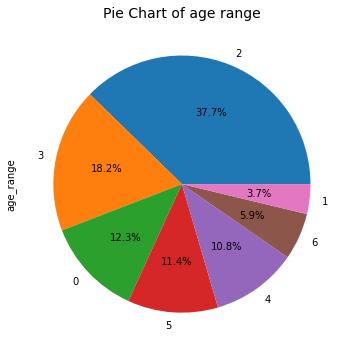

In [ ]:
plt.figure(figsize=(5,5))
df_race3['age_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of age range", fontdict={'fontsize': 14})
plt.tight_layout()

### randomly choose 3434 images

In [ ]:
df_rand_race3 = df_race3.sample(n=3434, random_state =1)
df_rand_race3.shape
df_rand_race3

,img,age,gender,race,age_range
18455,6_0_3_20170110213739717.jpg.chip.jpg,6,0,3,0
1974,55_0_3_20170119203913495.jpg.chip.jpg,55,0,3,5
2908,29_0_3_20170119195311707.jpg.chip.jpg,29,0,3,2
2773,28_0_3_20170119164001559.jpg.chip.jpg,28,0,3,2
2665,26_1_3_20170119193138609.jpg.chip.jpg,26,1,3,2
...,...,...,...,...,...
8727,26_1_3_20170117174606847.jpg.chip.jpg,26,1,3,2
2825,28_0_3_20170119194818178.jpg.chip.jpg,28,0,3,2
1932,54_1_3_20170119211354201.jpg.chip.jpg,54,1,3,5
2459,26_0_3_20170119180514197.jpg.chip.jpg,26,0,3,2


In [ ]:
# randomlist = random.sample(range(len(df_race3)), 1082)
# df_rand = df_race3.iloc[randomlist]
# df_rand

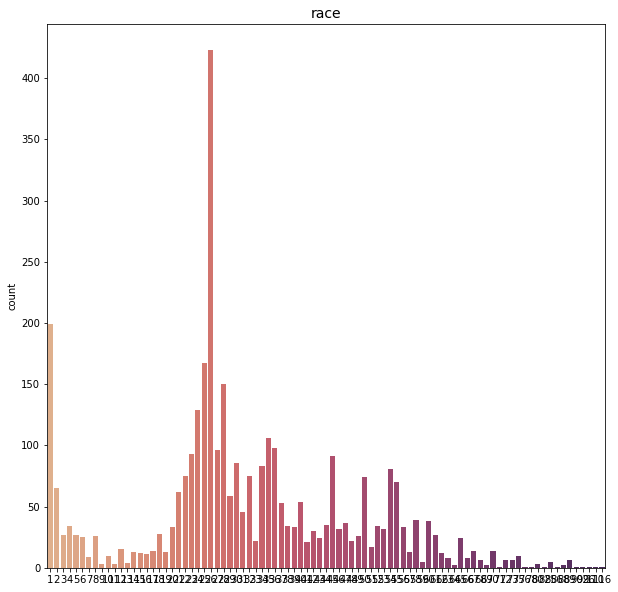

In [ ]:
alist = np.array(df_rand_race3["age"]).astype("int")
plt.figure(figsize=(10,10))
sns.countplot(x=np.sort(alist), data=df_rand_race3, palette = 'flare')
ax = plt.gca()
plt.title("race", fontdict={'fontsize': 14})
plt.show()

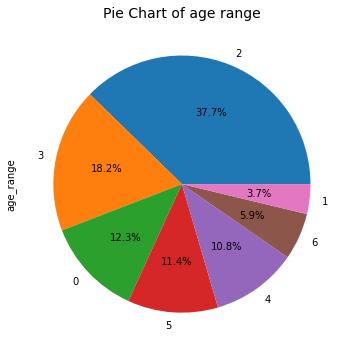

In [ ]:
plt.figure(figsize=(5,5))
df_race3['age_range'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of age range", fontdict={'fontsize': 14})
plt.tight_layout()

# Data setup

In [ ]:
## Additional External Libraries (Deep Learning)
import time
import datetime
import torchvision
import torch
import random
from sklearn.model_selection import train_test_split
from skimage import io
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as tfs
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader,SubsetRandomSampler
from PIL import Image
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchsummary import summary

gpu_boole = torch.cuda.is_available()

In [ ]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(df_race3["img"], df_race3["age_range"], test_size=0.1, random_state=601675, stratify=df_race3["age_range"])
X_train_age, X_val_age, y_train_age, y_val_age = train_test_split(X_train_age, y_train_age, test_size=0.1, random_state=601675, stratify=y_train_age)

In [ ]:
X_train_age

39       58_0_3_20170119211543234.jpg.chip.jpg
18106    24_1_3_20170104231625010.jpg.chip.jpg
19751    24_1_3_20170104223610175.jpg.chip.jpg
1994     55_1_3_20170119175053900.jpg.chip.jpg
1703     48_0_3_20170119205356352.jpg.chip.jpg
                         ...                  
22683     3_1_3_20161220220619722.jpg.chip.jpg
7840     60_0_3_20170117175443809.jpg.chip.jpg
9        56_0_3_20170119211644664.jpg.chip.jpg
22378     1_1_3_20161219225259040.jpg.chip.jpg
2954     30_0_3_20170119204722073.jpg.chip.jpg
Name: img, Length: 3220, dtype: object

In [ ]:
crop_image_path = "./Dataset/UTKFace"

img_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.PILToTensor(),
])


class Crop_Face_Data(Dataset):
    def __init__(self, 
                 X_train,
                 y_train,
                 data_dir = crop_image_path,
                 transforms = img_transform, 
                 use_memory = False):
      #if load all data into memeory 
      self.use_memory = use_memory
      self.transform = transforms
      self.data = []
      self.labels = []
      for i,img_name in enumerate(X_train):
        img_path = join(data_dir, img_name)
        if self.use_memory:
          self.data.append(Image.open(img_path))
        else:
          self.data.append(img_path)
        self.labels.append(y_train.tolist()[i])

    def __len__(self):
      return len(self.labels)

    def __getitem__(self, idx):
      if self.use_memory:
        img = self.data[idx]
      else:
        img = Image.open(self.data[idx])
      if self.transform:
        img = self.transform(img)
      return img, float(self.labels[idx])

In [ ]:
Batch_Size = 8

use_memory = True

train_age_dataset = Crop_Face_Data(X_train = X_train_age, 
                                        y_train = y_train_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
train_age_dataloader = DataLoader(train_age_dataset, batch_size=Batch_Size, shuffle=True)

val_age_dataset = Crop_Face_Data(X_train = X_val_age, 
                                        y_train = y_val_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
val_age_dataloader = DataLoader(val_age_dataset, batch_size=Batch_Size, shuffle=True)

test_age_dataset = Crop_Face_Data(X_train = X_test_age, 
                                        y_train = y_test_age, 
                                        data_dir = crop_image_path, 
                                        transforms=img_transform, 
                                        use_memory = use_memory)
test_age_dataloader = DataLoader(test_age_dataset, batch_size=Batch_Size, shuffle=True)

In [ ]:
def train(model,
          model_name,
          optimizer,
          loss,
          lr,
          epochs,
          train_dataloader,
          val_dataloader,
          test_dataloader,
          **kwargs):
    """
    
    """
    ##TODO: Implement a training loop

    net = model.cuda()

    optimizer = optimizer(net.parameters(), lr = lr)
    loss_metric = loss()

    val_loss_old = 10000
    val_loss_unchanged_counter = 0

    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    val_loss_list = []

    
    print("Start Training")
    #training loop:
    for epoch in range(epochs):
      time1 = time.time() #timekeeping

      correct = 0
      total = 0
      loss_sum = 0

      for i, (x,y) in enumerate(train_dataloader):

        x = x.float()
        y = y.float()

        if gpu_boole:
          x = x.cuda()
          y = y.cuda()

        #loss calculation and gradient update:

        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = net.forward(x)
        #print("y:",y)
        #print("outputs:",outputs)
        loss = loss_metric(outputs,y.to(torch.int64))
        loss.backward()

        loss_sum += loss

        ##performing update:
        optimizer.step()

        total += y.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted.float() == y.float()).sum()

      #print("total:",total)
      #print("correct:",correct)

      train_acc, train_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

      train_loss_list.append(train_loss)
      train_acc_list.append(train_acc)


      with torch.no_grad():

          correct = 0
          total = 0
          loss_sum = 0

          for i, (x,y) in enumerate(val_dataloader):

            x = x.float()
            y = y.float()

            if gpu_boole:
              x = x.cuda()
              y = y.cuda()
            
            outputs = net.forward(x)
            loss = loss_metric(outputs,y.to(torch.int64))

            total += y.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted.float() == y.float()).sum()
            loss_sum += loss

          val_acc, val_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

          val_acc_list.append(val_acc)
          val_loss_list.append(val_loss)

          if(val_loss_old == val_loss):
            val_loss_unchanged_counter+=1
          else:
            torch.save({
            'epoch': EPOCH,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc_list,
            'train_acc': train_acc_list,
            'val_loss': val_loss_list,
            'train_loss': train_loss_list,
            }, f"./New_Final_Cross_Race_Effect/race_{race_num}_checkpts/{model_name}_race_{race_num}_age_best.pt")
            val_loss_unchanged_counter = 0
          val_loss_old = val_loss

          print("Epoch",epoch+1,':')

          print("-"*20)
          print('Train accuracy: %f %%' % (100.0 * train_acc))
          print('Train loss: %f' % (train_loss))
          print("-"*20)
          print('Validation accuracy: %f %%' % (100.0 * val_acc))
          print('Validation loss: %f' % (val_loss))
          print("-"*20)

          time2 = time.time() #timekeeping
          print('Elapsed time for epoch:',time2 - time1,'s')
          print('ETA of completion:',(time2 - time1)*(epochs - epoch - 1)/60,'minutes')
          print()

          if(val_loss_unchanged_counter == 10):
            print("validation loss hasn't changed in 10 epochs: end training")
            break

    plt.figure(figsize=(10,10))
    plt.plot(torch.tensor(train_loss_list).cpu().detach().numpy(), '-o', label = 'train_loss', color = 'orange')
    plt.xlabel('Epochs')
    plt.ylabel('Train Loss')
    plt.legend()
    plt.show()


    plt.figure(figsize=(10,10))
    plt.plot(torch.tensor(val_acc_list).cpu().detach().numpy(), '-o', label = 'val_acc', color = 'blue')
    plt.xlabel('Epochs')
    plt.ylabel('Val Accuracy')
    plt.legend()
    plt.show()

    with torch.no_grad():

        correct = 0
        total = 0
        loss_sum = 0

        for i, (x,y) in enumerate(test_dataloader):

          x = x.float()
          y = y.float()

          if gpu_boole:
            x = x.cuda()
            y = y.cuda()

          outputs = net.forward(x)
          loss = loss_metric(outputs,y.to(torch.int64))

          total += y.size(0)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted.float() == y.float()).sum()

          loss_sum += loss

        test_acc, test_loss = correct / total, loss_sum.cpu().data.numpy().item()/total

        print("-"*20)
        print('Test accuracy: %f %%' % (100.0 * test_acc))
        print('Test loss: %f' % (test_loss))
        print("-"*20)

# Resnet101

In [ ]:
import torchvision.models as models

class ResNet101(nn.Module):
  def __init__(self, in_channels=3):
    super(ResNet101, self).__init__()

    # Load a pretrained resnet model from torchvision.models in Pytorch
    self.model = models.resnet101(pretrained=True)

    # Change the input layer to take Grayscale image, instead of RGB images. 
    # Hence in_channels is set as 1 or 3 respectively
    # original definition of the first layer on the ResNet class
    # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.model.conv1 = nn.Conv2d(in_channels, 64,3)

    #i=0
    #for param in self.model.parameters():
    #    if i>39 and i<343:
    #        param.requires_grad = False
    #    i+=1 
    
    # Change the output layer to output 10 classes instead of 1000 classes
    num_ftrs = self.model.fc.in_features
    self.model.fc = nn.Linear(num_ftrs, 7)

  def forward(self, x):
    x = self.model(x)
    return F.log_softmax(x,dim=1)

In [ ]:
with torch.no_grad():
  dummy_net = ResNet101()
  dummy_net = dummy_net.cuda()
  summary(dummy_net, (3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 222, 222]           1,792
       BatchNorm2d-2         [-1, 64, 222, 222]             128
              ReLU-3         [-1, 64, 222, 222]               0
         MaxPool2d-4         [-1, 64, 111, 111]               0
            Conv2d-5         [-1, 64, 111, 111]           4,096
       BatchNorm2d-6         [-1, 64, 111, 111]             128
              ReLU-7         [-1, 64, 111, 111]               0
            Conv2d-8         [-1, 64, 111, 111]          36,864
       BatchNorm2d-9         [-1, 64, 111, 111]             128
             ReLU-10         [-1, 64, 111, 111]               0
           Conv2d-11        [-1, 256, 111, 111]          16,384
      BatchNorm2d-12        [-1, 256, 111, 111]             512
           Conv2d-13        [-1, 256, 111, 111]          16,384
      BatchNorm2d-14        [-1, 256, 1

In [ ]:
## Hyperparameters
EPOCH = 100
LR = 0.005

## Setting up the model, optimizer, and loss function
model = ResNet101()
model_name = "resnet101"
optimizer = optim.SGD
loss_f = nn.NLLLoss

Start Training
Epoch 1 :
--------------------
Train accuracy: 40.993790 %
Train loss: 0.197547
--------------------
Validation accuracy: 51.675976 %
Validation loss: 0.168870
--------------------
Elapsed time for epoch: 126.71891665458679 s
ETA of completion: 209.0862124800682 minutes

Epoch 2 :
--------------------
Train accuracy: 51.335400 %
Train loss: 0.155989
--------------------
Validation accuracy: 53.072624 %
Validation loss: 0.153802
--------------------
Elapsed time for epoch: 122.56787729263306 s
ETA of completion: 200.19419957796734 minutes

Epoch 3 :
--------------------
Train accuracy: 56.304348 %
Train loss: 0.136610
--------------------
Validation accuracy: 55.586590 %
Validation loss: 0.141427
--------------------
Elapsed time for epoch: 122.61169004440308 s
ETA of completion: 198.22223223845165 minutes

Epoch 4 :
--------------------
Train accuracy: 61.086952 %
Train loss: 0.120459
--------------------
Validation accuracy: 53.910614 %
Validation loss: 0.137809
-------

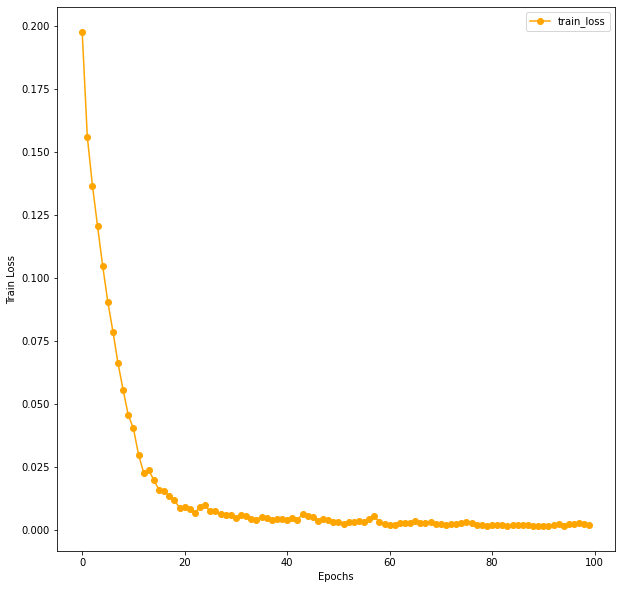

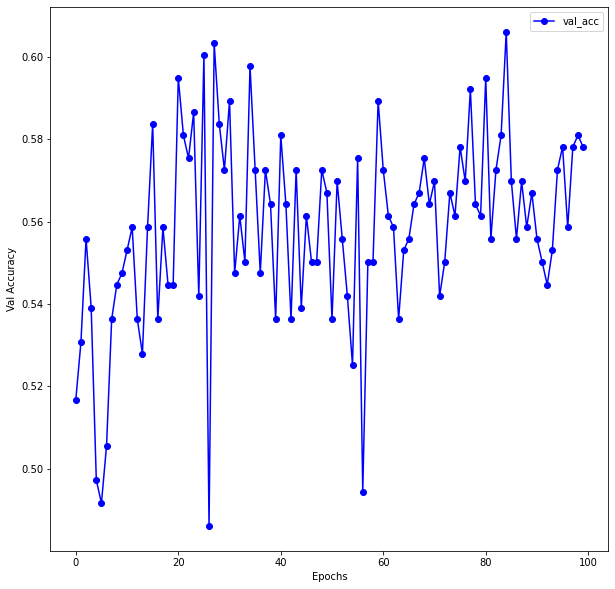

--------------------
Test accuracy: 59.547741 %
Test loss: 0.281770
--------------------


In [ ]:
## Run Training Loop
out = train(model,
            model_name, 
            optimizer, 
            loss_f,
            LR,
            epochs = EPOCH,
            train_dataloader = train_age_dataloader,
            val_dataloader = val_age_dataloader,
            test_dataloader = test_age_dataloader)

In [ ]:
break

SyntaxError: ignored

# VGG16

In [ ]:
# import torchvision.models as models

# class VGG16(nn.Module):
#   def __init__(self, in_channels=3):
#     super(VGG16, self).__init__()

#     # Load a pretrained resnet model from torchvision.models in Pytorch
#     self.model = models.vgg16(pretrained=True)

#     # Change the input layer to take Grayscale image, instead of RGB images. 
#     # Hence in_channels is set as 1 or 3 respectively
#     # original definition of the first layer on the ResNet class
#     # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
#     self.model.conv1 = nn.Conv2d(in_channels, 64,3)

#     i=0
#     #for param in self.model.parameters():
#     #    if i>39 and i<343:
#     #        param.requires_grad = False
#     #    i+=1 
    
#     # Change the output layer to output 10 classes instead of 1000 classes
#     num_ftrs = self.model.classifier[6].in_features
#     self.model.classifier[6] = nn.Linear(num_ftrs, 7)

#   def forward(self, x):
#     x = self.model(x)
#     return F.log_softmax(x,dim=1)

In [ ]:
# with torch.no_grad():
#   dummy_net = VGG16()
#   dummy_net = dummy_net.cuda()
#   summary(dummy_net, (3, 224, 224))

In [ ]:
# ## Hyperparameters
# EPOCH = 100
# LR = 0.005

# ## Setting up the model, optimizer, and loss function
# model = VGG16()
# model_name = "VGG16"
# optimizer = optim.Adam
# loss_f = nn.NLLLoss

In [ ]:
# ## Run Training Loop
# out = train(model, 
#             model_name,
#             optimizer, 
#             loss_f,
#             LR,
#             epochs = EPOCH,
#             train_dataloader = train_age_dataloader,
#             val_dataloader = val_age_dataloader,
#             test_dataloader = test_age_dataloader)

In [ ]:
# import gc
# del train
# gc.collect()